In [4]:
# Importing Dependencies

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

In [9]:
# Importing Boston house price dataset

In [10]:
house_price_dataframe = pd.read_csv('Boston.csv')

In [11]:
house_price_dataframe.head(2)

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [12]:
house_price_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Crime Rate                      506 non-null    float64
 1   Residential Proportion          506 non-null    float64
 2   non-retail business acres/Town  506 non-null    float64
 3   Charles River                   506 non-null    float64
 4   NO2 concentration               506 non-null    float64
 5   Average Rooms/Dwelling.         506 non-null    float64
 6   Prior Built Units Proportion    506 non-null    float64
 7   Distance to Employment Centres  506 non-null    float64
 8   Radial Highways Distance        506 non-null    float64
 9   ValueProperty/tax rate          506 non-null    float64
 10  Teacher/town                    506 non-null    float64
 11  blacks/town                     506 non-null    float64
 12  Lower Status Percent            506 

In [13]:
house_price_dataframe.describe()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
house_price_dataframe.shape

(506, 14)

In [18]:
house_price_dataframe.isnull().sum().sum()

np.int64(0)

In [19]:
# Checking the correlation between the verious features in dataset

In [21]:
correlation = house_price_dataframe.corr()

<Axes: >

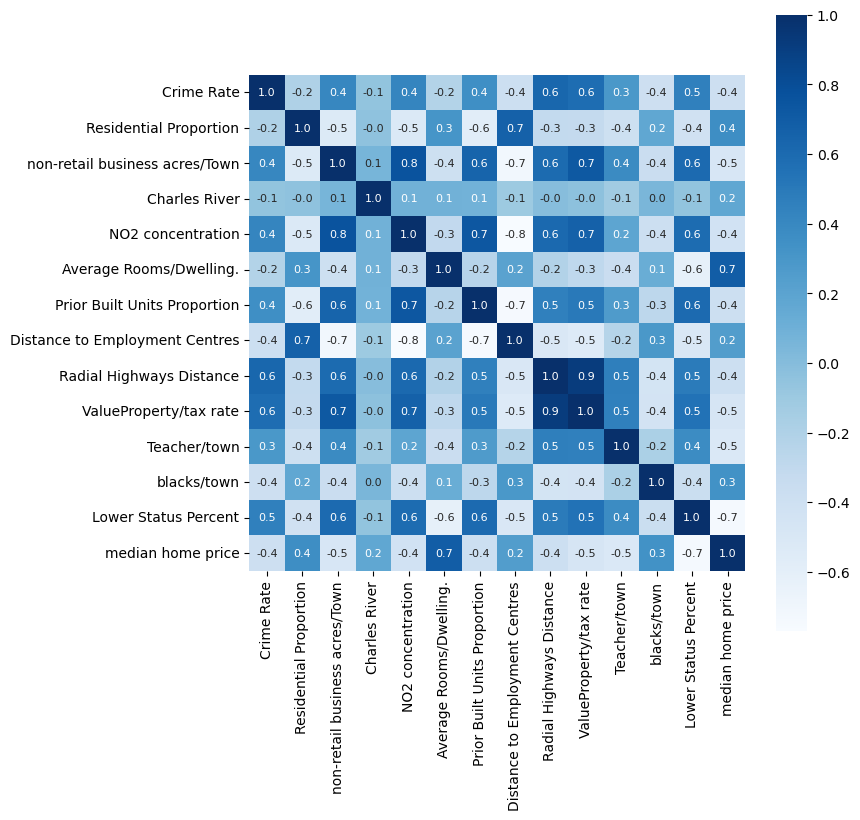

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [23]:
# Splitting Data and Target to train the model

In [24]:
X = house_price_dataframe.drop(columns='median home price',axis=1)
Y = house_price_dataframe['median home price']

In [25]:
print(X)
print(Y)

     Crime Rate  Residential Proportion  non-retail business acres/Town  \
0       0.00632                    18.0                            2.31   
1       0.02731                     0.0                            7.07   
2       0.02729                     0.0                            7.07   
3       0.03237                     0.0                            2.18   
4       0.06905                     0.0                            2.18   
..          ...                     ...                             ...   
501     0.06263                     0.0                           11.93   
502     0.04527                     0.0                           11.93   
503     0.06076                     0.0                           11.93   
504     0.10959                     0.0                           11.93   
505     0.04741                     0.0                           11.93   

     Charles River  NO2 concentration  Average Rooms/Dwelling.  \
0              0.0              0

In [26]:
# Splitting data into training and testing model

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


In [30]:
# Model Training using XGBoost Regressor 

In [31]:
model = XGBRegressor()

In [32]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [33]:
# Model Evalution and Prediction on training data

In [34]:
training_data_prediction = model.predict(X_train)

In [35]:
print(training_data_prediction)

[23.112196  20.992601  20.10438   34.67932   13.920501  13.499354
 21.998383  15.206723  10.89543   22.67402   13.795236   5.602332
 29.808502  49.98666   34.89634   20.594336  23.388903  19.2118
 32.69294   19.604128  26.978151   8.405952  46.00062   21.70406
 27.084402  19.372278  19.297894  24.79984   22.608278  31.707775
 18.53683    8.703393  17.40025   23.698814  13.29729   10.504759
 12.693588  24.994888  19.694864  14.911037  24.20254   24.991112
 14.901547  16.987965  15.592753  12.704759  24.505623  15.007718
 49.999355  17.509344  21.18844   31.999287  15.606071  22.902134
 19.309835  18.697083  23.302961  37.19767   30.102247  33.117855
 20.993683  50.00471   13.40048    5.002565  16.50862    8.4016905
 28.651423  19.49218   20.595366  45.404697  39.808857  33.4055
 19.81498   33.406376  25.30206   49.998615  12.544487  17.433802
 18.602612  22.601418  50.004013  23.814182  23.313164  23.097467
 41.71243   16.112017  31.604454  36.09397    7.0009975 20.406271
 19.992195  12

In [36]:
# Checking R Squre error & Mean absolute error on Train data

In [37]:
# R Squre error 
score_1 = metrics.r2_score(Y_train,training_data_prediction)

# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)

print('R Squre error : ', score_1)
print('Mean absolute error : ',score_2)

R Squre error :  0.9999980039471451
Mean absolute error :  0.0091330346494618


In [43]:
# Scatter plot to check the differance between actual value and predicted values in training data

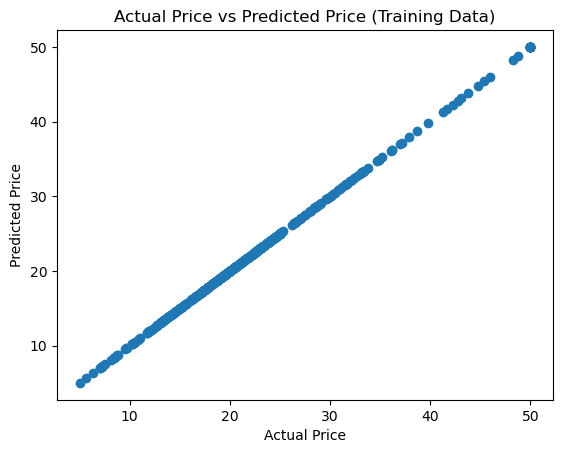

In [50]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price (Training Data)")
plt.show()

In [38]:
# Prediction on Test data

In [40]:
test_data_prediction = model.predict(X_test)

In [41]:
# Checking R Squre error & Mean absolute error on Test data

In [42]:
# R Squre error 
score_1 = metrics.r2_score(Y_test,test_data_prediction)

# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_test,test_data_prediction)

print('R Squre error : ', score_1)
print('Mean absolute error : ',score_2)

R Squre error :  0.9051721149855378
Mean absolute error :  2.0748727686264927


In [47]:
# Scatter plot to check the differance between actual value and predicted values in training data

Text(0.5, 1.0, 'Actual Price vs Predicted Price (Testing Data)')

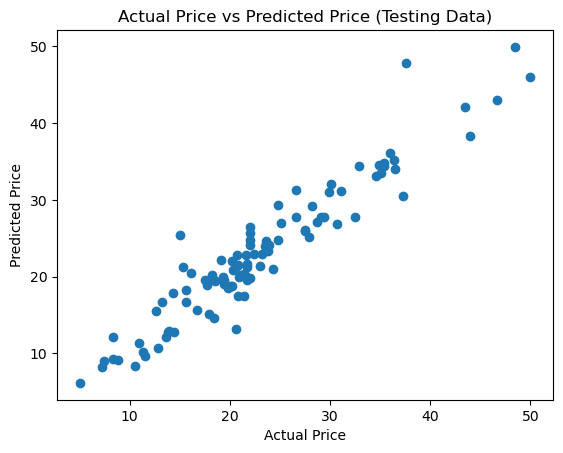

In [51]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price (Testing Data)")